In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import emoji

In [4]:
cd ../

C:\Users\井原輝人\Desktop\sorcecode\twitter


In [5]:

df = pd.read_csv('./data/1.train_data.csv')

df[df["flg"] == 0 ]["keyword"]

0            覚醒剤
1           雷 落雷
2             血液
3          ハリケーン
4            殺人鬼
          ...   
20280       爆発した
20281       爆発した
20282         爆発
20283    緊急 緊急事態
20284         炎上
Name: keyword, Length: 18851, dtype: object

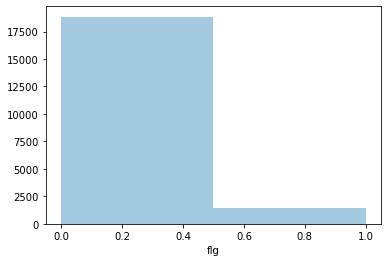

In [6]:

sns.distplot(df["flg"], kde=False, rug=False, bins=2) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20285 entries, 0 to 20284
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        20285 non-null  int64 
 1   flg       20285 non-null  int64 
 2   keyword   20285 non-null  object
 3   location  11819 non-null  object
 4   text      20285 non-null  object
dtypes: int64(2), object(3)
memory usage: 792.5+ KB


In [8]:
key_df = df.groupby("keyword").describe()
key_df["flg"]

,count,mean,std,min,25%,50%,75%,max
keyword,,,,,,,,
ウイルス,221.0,0.031674,0.175529,0.0,0.0,0.0,0.0,1.0
ウイルス テロ,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
ウイルス 崩壊,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
ウイルス 暴走,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
サイレン,202.0,0.069307,0.254606,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
震源地 崩壊,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
飢饉,239.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
飢饉 崩落,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [9]:
key_df.index

Index(['ウイルス', 'ウイルス テロ', 'ウイルス 崩壊', 'ウイルス 暴走', 'サイレン', 'サイレン 患者', 'サイレン 消防車',
       'サイレン 衝突', 'サイレン 避難', 'ストーカー',
       ...
       '震源の深さ', '震源の深さ 大災害', '震源の深さ 震源地', '震源地', '震源地 ウイルス', '震源地 崩壊', '飢饉',
       '飢饉 崩落', '騒乱', '騒乱 殺人者'],
      dtype='object', name='keyword', length=315)

In [10]:
key_df.to_csv("keys.csv")

In [11]:
reply_df = df[df['text'].str.contains('@')]

In [12]:
# 返事について見てみると特に関係なさそう
reply_df[df['flg']==1]["text"].to_csv("reply_1.csv")
reply_df[df['flg']==0]["text"].to_csv("reply_0.csv")

c:\users\井原輝人\desktop\sorcecode\twitter\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\井原輝人\desktop\sorcecode\twitter\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


5190


c:\users\井原輝人\desktop\sorcecode\twitter\venv\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


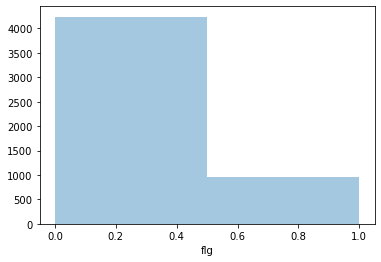

In [13]:
#urlを含むかどうか
df["is_url"] = df['text'].str.contains(r'(https?://[\w/:%#\$&\?\(\)~\.=\+\-]+)')
print(sum(df["is_url"]))
sns.distplot(df[df["is_url"]]["flg"], kde=False, rug=False, bins=2) 

8466


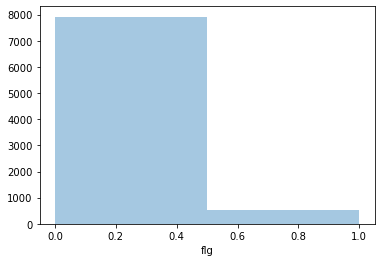

In [14]:
#locationがあるかどうか
df["is_location"] = df["location"].isnull()
print(sum(df["is_location"]))
sns.distplot(df[df["is_location"]]["flg"], kde=False, rug=False, bins=2) 

In [20]:
#絵文字があるかどうか
df["num_emoji"] = np.zeros(len(df.index))
for idx in range(0,len(df.index)):
    for letter in df["text"].loc[idx]:
        if letter in  emoji.EMOJI_UNICODE.values():
            df["num_emoji"].loc[idx] += 1

c:\users\井原輝人\desktop\sorcecode\twitter\venv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


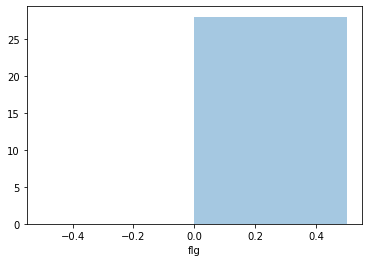

In [32]:
sns.distplot(df[df["is_emoji"]==8]["flg"], kde=False, rug=False, bins=2)

In [34]:
df.to_csv('./arranged_data/is_flag_df.csv')


In [ ]:
#リプライメッセージかどうか
df = df.replace(r'(https?://[\w/:%#\$&\?\(\)~\.=\+\-]+)',"",regex=True)#url
none_reply_df.to_csv("none_reply_df.csv")

In [10]:
#url reply  削除
none_url_df = df.replace(r'(https?://[\w/:%#\$&\?\(\)~\.=\+\-]+)',"",regex=True)#url
none_reply_df = none_url_df.replace(r"@([A-Za-z0-9_]+) ","",regex = True)#
none_reply_df = none_reply_df.replace(r"@([A-Za-z0-9_])+) ","",regex = True)#
none_reply_df.to_csv("none_reply_df.csv")


In [11]:
#リプライ(@から始まる)消します
none_reply_df

## ノート　
- urlを含むものは1である可能性が高い
- location は微妙
- 絵文字は関係ないものが多い